## Load data

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
cwd = os.getcwd(); print("Working dir: " + cwd)

Working dir: /Users/dang/Documents/TablerLab/Code


In [5]:
data_path+filename

'/Users/dang/Documents/TablerLab/Data_Adrian_cell_tracks/Tracks Results from MaxProjected_Stitched_Blurred_190305 ML1 OsxGFP Explant Video 1 (0-12hr) in um per min.csv'

In [25]:
data_path = "/Users/dang/Documents/TablerLab/Data_Adrian_cell_tracks/";
filename = "Tracks_Results_from_MaxProjected_Stitched_Blurred_190305_ML1_OsxGFP_Explant_Video_1_(0-12hr)_in_um_per_min.csv";
#filename = "test.csv"
loaded_data = pd.read_csv( data_path+filename )
loaded_data.head()

,Track,Slice,X,Y,Distance,Velocity,Pixel Value
0,1,1,2022,795,-1.000,-1.000,17
1,1,2,2007,777,3.023,0.302,8
2,1,3,2007,791,1.806,0.181,10
3,1,4,2024,797,2.326,0.233,15
4,1,5,2035,802,1.559,0.156,8


In [40]:
# Total number of cells
N_cells = len(np.unique(loaded_data.Track));
print("Number of cells = " + str(N_cells))

# Number of slices per cell
N_slices = len(np.unique(loaded_data.Slice));
print("Number of slices per cell = " + str(N_slices))

Number of cells = 11
Number of slices per cell = 73


### Plot x-displacement vs t
Infer velocities from slopes. 
Compare front and back.

In [83]:
X_all = np.nan*np.zeros([N_cells, N_slices]);
Y_all = np.nan*np.zeros([N_cells, N_slices]);

for i in range(N_cells):
    # select cell i
    data_cell_i = loaded_data.loc[loaded_data.Track == i+1];
    slices_cell_i = data_cell_i.Slice-1;
    
    # store data
    X_all[i, slices_cell_i] = data_cell_i.X;
    Y_all[i, slices_cell_i] = data_cell_i.Y; 

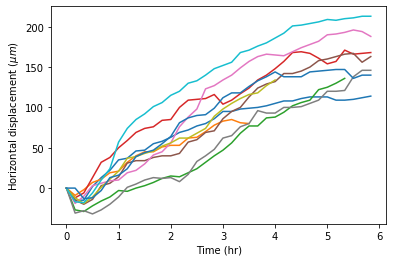

In [118]:
# Plot displacements in horizontal direction vs t
slices_all = np.array([range(N_slices) for i in range(N_cells)])/6;
X_displacements = np.array(list(map(lambda x: x-x[0], X_all)));

slice_range = range(6*6); 
#slice_range = range(Nslices) #full range

plt.figure();
plt.plot(slices_all[:, slice_range].T, X_displacements[:, slice_range].T)
plt.xlabel('Time (hr)')
plt.ylabel('Horizontal displacement ($\\mu m$)')
plt.show()

### Plot absolute displacement vs t


### Plot MSD vs t
Mean square displacement

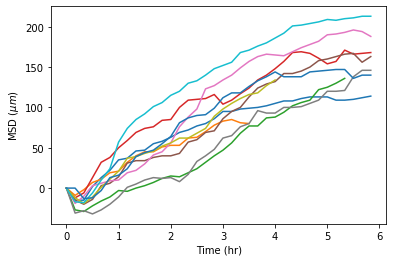

In [117]:
# Plot displacements in horizontal direction vs t
slices_all = np.array([range(N_slices) for i in range(N_cells)])/6;
MSD_all = list(map( lambda X, Y: np.sqrt( (X-X[0])**2 + (Y-Y[0])**2) , X_all, Y_all))

slice_range = range(6*6); 
#slice_range = range(Nslices) #full range

plt.figure();
plt.plot(slices_all[:, slice_range].T, X_displacements[:, slice_range].T)
plt.xlabel('Time (hr)')
plt.ylabel('MSD ($\\mu m$)')
plt.show()